In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import ast

To extract the average properties of a feature in a Hi-C map, we can make a summation of the snippets with specified feature (e.g., TADs). In this notebook we showed the usage of pile-up functions for the analysis of few fetures. 

### functions

In [3]:
def pileup_offdiag(contact_map,boundary_list,min_dist,max_dist,bin_num=5,window_size=10):
    
    interval=[min_dist,max_dist]
    bin_borders=np.histogram(interval,bins=bin_num+1)[1]
    bin_border_int=[int(x) for x in bin_borders]
    
    pile_ups=[] #pile_up elements and the distance from the diagonal
    for i in range(bin_num):
        mat=np.zeros((window_size,window_size))
        dist=(bin_border_int[i]+bin_border_int[i+1])/2

        for i_element in boundary_list: 
            for j_element in boundary_list:
                if bin_border_int[i]<=(j_element-i_element) <bin_border_int[i+1]:
                    mat+=contact_map[i_element-window_size//2:i_element+window_size//2,j_element-window_size//2:j_element+window_size//2]    
        pile_ups.append([dist,mat])
        
        
    return pile_ups

### Loading simulated data

In [6]:
path_dict = {}

directory='/project/fudenber_735/polychrom/pds5_wapl_nipbl/layout_with_random_b/'


samples=['LIFETIME_50_SEPARATION_100_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_1_Tad_1000',
       'LIFETIME_50_SEPARATION_150_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_1_Tad_1000',
       'LIFETIME_50_SEPARATION_500_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_1_Tad_1000']


### Analysis

In this section we applied off-diagonal pile ups to investigate the overal characteristics of peaks respect to their distance from the main diagonal.  

In [8]:
#List of the position of boundary elements on the main diagonal. 

right_boundary_list=[15, 50,115, 175,519,670,830,1100,1180,1270,1350,1430]

left_boundary_list=[40,70,135,275,510,650,730,870,1185,1240,1330,1390]

lst=right_boundary_list+left_boundary_list
lst=np.sort(lst)
lst=np.unique(lst)

---

- If we consider all of the boundary elements:

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


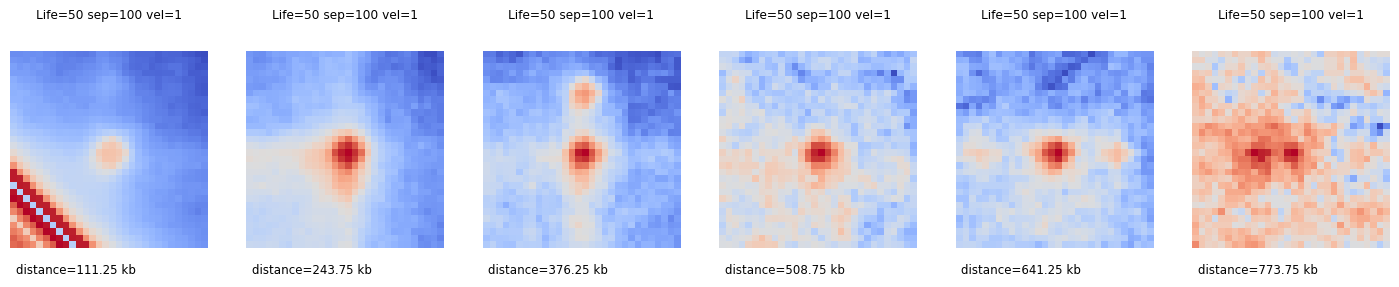

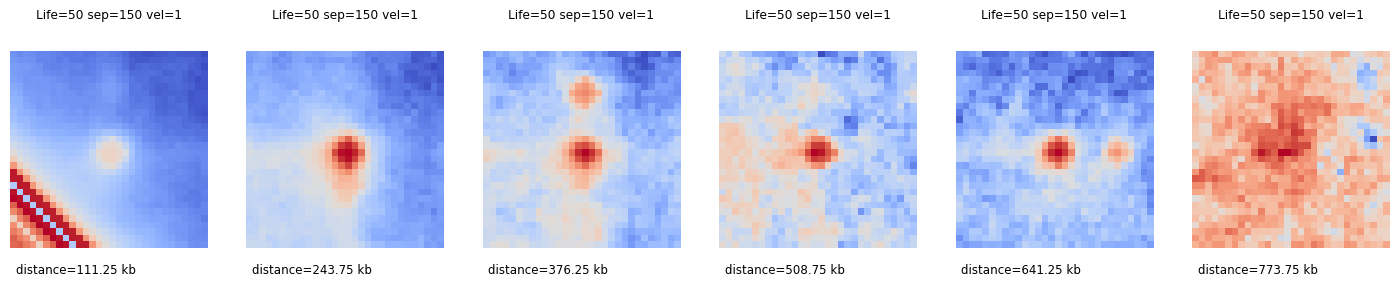

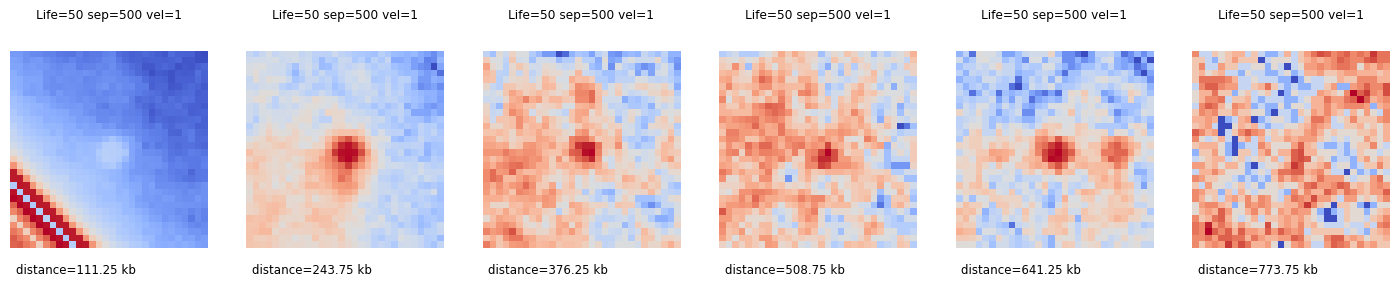

In [11]:
for name in samples:
    params = [ast.literal_eval(i) for i in name.split('_')[1::2]]
    Lifetime, separation, rstall, lstall, rc, lc, stalldist, steps, velocity, Tad=params
    
    #importing saved maps as matrices 
    data = np.load(directory+'maps/%s.npz'%name)
    mrcn=data['arr_0']
    mrc  = mrcn.astype(float)
    mrc /= np.median(np.diag(mrc,2))
    mat = np.log10(mrc)
    pile=pileup_offdiag(mrc,lst,18,390, 6,30)
    
    #figure characteristics
    subplot_width = 3
    numx,numy = 10,3
    plt.figure(figsize=(subplot_width*numx,subplot_width*numy))
    c=0
    subplot_width = 3
    
    for i in range(6):
        c+=1
        plt.subplot(numy,numx, c)
        plt.matshow(np.log10(pile[i][1]), cmap='coolwarm',fignum=False);
        plt.title('Life=%s sep=%s vel=%s'%(Lifetime,separation,velocity),fontsize=8.75)
        plt.axis('off')
        plt.text(.35,33.5,'distance=%s kb'%(pile[i][0]*(2.5)),fontsize=8.5)
    plt.show()

---

- If we consider only the right-stall boundary elements:

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


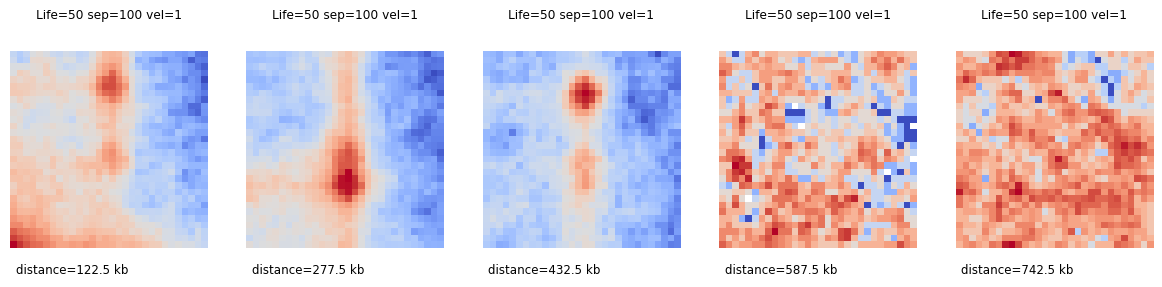

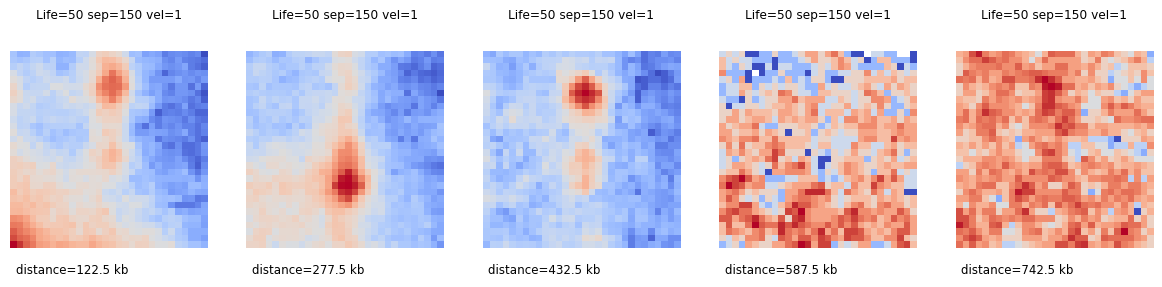

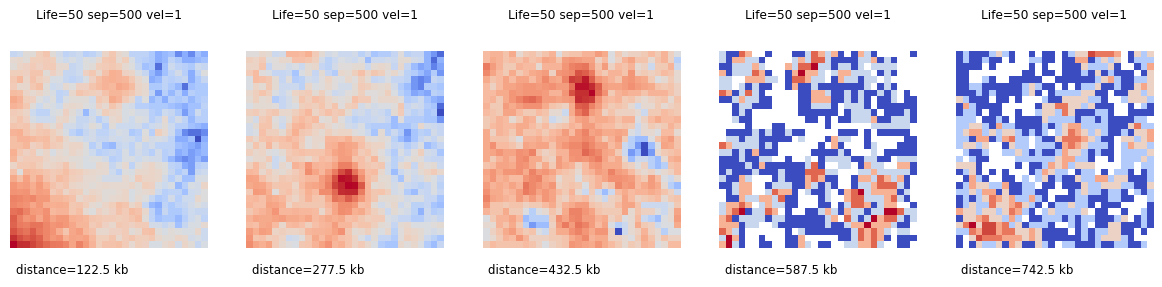

In [15]:
for name in samples:
    params = [ast.literal_eval(i) for i in name.split('_')[1::2]]
    Lifetime, separation, rstall, lstall, rc, lc, stalldist, steps, velocity, Tad=params
    
    #importing saved maps as matrices 
    data = np.load(directory+'maps/%s.npz'%name)
    mrcn=data['arr_0']
    mrc  = mrcn.astype(float)
    mrc /= np.median(np.diag(mrc,2))
    mat = np.log10(mrc)
    pile=pileup_offdiag(mrc,right_boundary_list,18,390, 5,30)
    
    #figure characteristics
    subplot_width = 3
    numx,numy = 10,3
    plt.figure(figsize=(subplot_width*numx,subplot_width*numy))
    c=0
    subplot_width = 3
    
    for i in range(5):
        c+=1
        plt.subplot(numy,numx, c)
        plt.matshow(np.log10(pile[i][1]), cmap='coolwarm',fignum=False);
        plt.title('Life=%s sep=%s vel=%s'%(Lifetime,separation,velocity),fontsize=8.75)
        plt.axis('off')
        plt.text(.35,33.5,'distance=%s kb'%(pile[i][0]*(2.5)),fontsize=8.5)
    plt.show()

---

- And if we consider only the left_stall boundary elements:

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


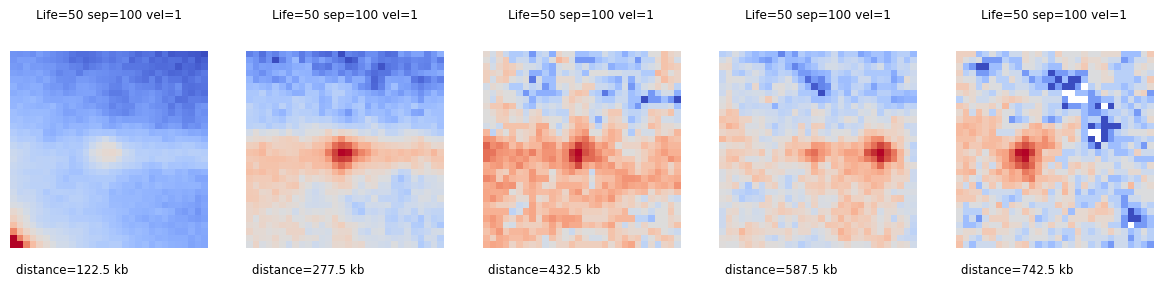

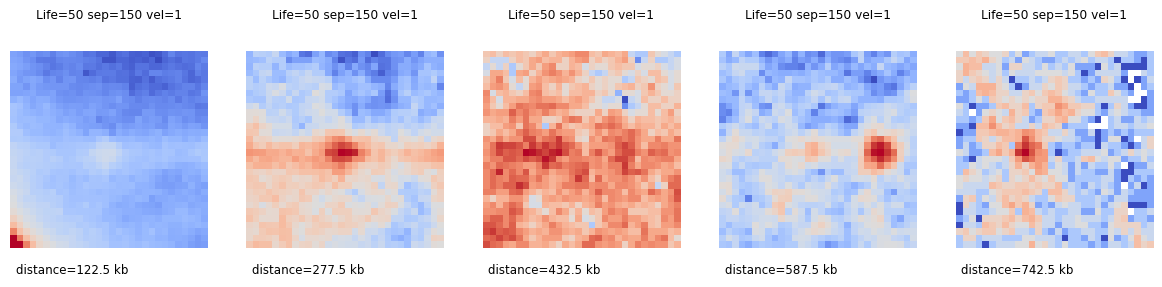

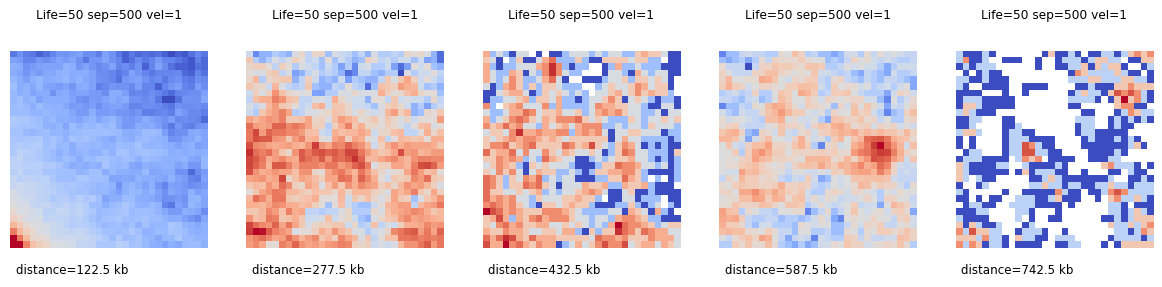

In [16]:
for name in samples:
    params = [ast.literal_eval(i) for i in name.split('_')[1::2]]
    Lifetime, separation, rstall, lstall, rc, lc, stalldist, steps, velocity, Tad=params
    
    #importing saved maps as matrices 
    data = np.load(directory+'maps/%s.npz'%name)
    mrcn=data['arr_0']
    mrc  = mrcn.astype(float)
    mrc /= np.median(np.diag(mrc,2))
    mat = np.log10(mrc)
    pile=pileup_offdiag(mrc,left_boundary_list,18,390, 5,30)
    
    #figure characteristics
    subplot_width = 3
    numx,numy = 10,3
    plt.figure(figsize=(subplot_width*numx,subplot_width*numy))
    c=0
    subplot_width = 3
    
    for i in range(5):
        c+=1
        plt.subplot(numy,numx, c)
        plt.matshow(np.log10(pile[i][1]), cmap='coolwarm',fignum=False);
        plt.title('Life=%s sep=%s vel=%s'%(Lifetime,separation,velocity),fontsize=8.75)
        plt.axis('off')
        plt.text(.35,33.5,'distance=%s kb'%(pile[i][0]*(2.5)),fontsize=8.5)
    plt.show()